In [23]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Steps to investigate Titanic Problem
1. Exploratory Data Analysis (EDA)
   - Visualizing the data to understand patterns and relationships
   - Identifying correlations between features
1. Feature Engineering
   - Creating new features from existing ones
   - Encoding categorical variables
   - Handling missing values
1. Model Selection
   - Choosing appropriate machine learning models for classification
1. Model Training
   - Training models on the training dataset
1. Model Evaluation
   - Evaluating model performance on a validation set
1. Model Improvement
   - Applying techniques like ensemble methods or feature selection to improve model performance
1. Final Model Testing
   - Testing the final model on the test dataset to estimate real-world performance
1. Conclusion and Interpretation
    - Summarizing findings
    - Discussing the implications of the model results
    - Suggesting next steps for further research or application

In [24]:
data_path = "/kaggle/input/titanic/"
# data_path = "data/"

In [25]:
def println(s="=", n=30):
    print("="*n)

In [26]:
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))

display(train_df.info())
println()

display(train_df.describe())
println()

display(train_df.head())
println()

test_df = pd.read_csv(os.path.join(data_path, "test.csv"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

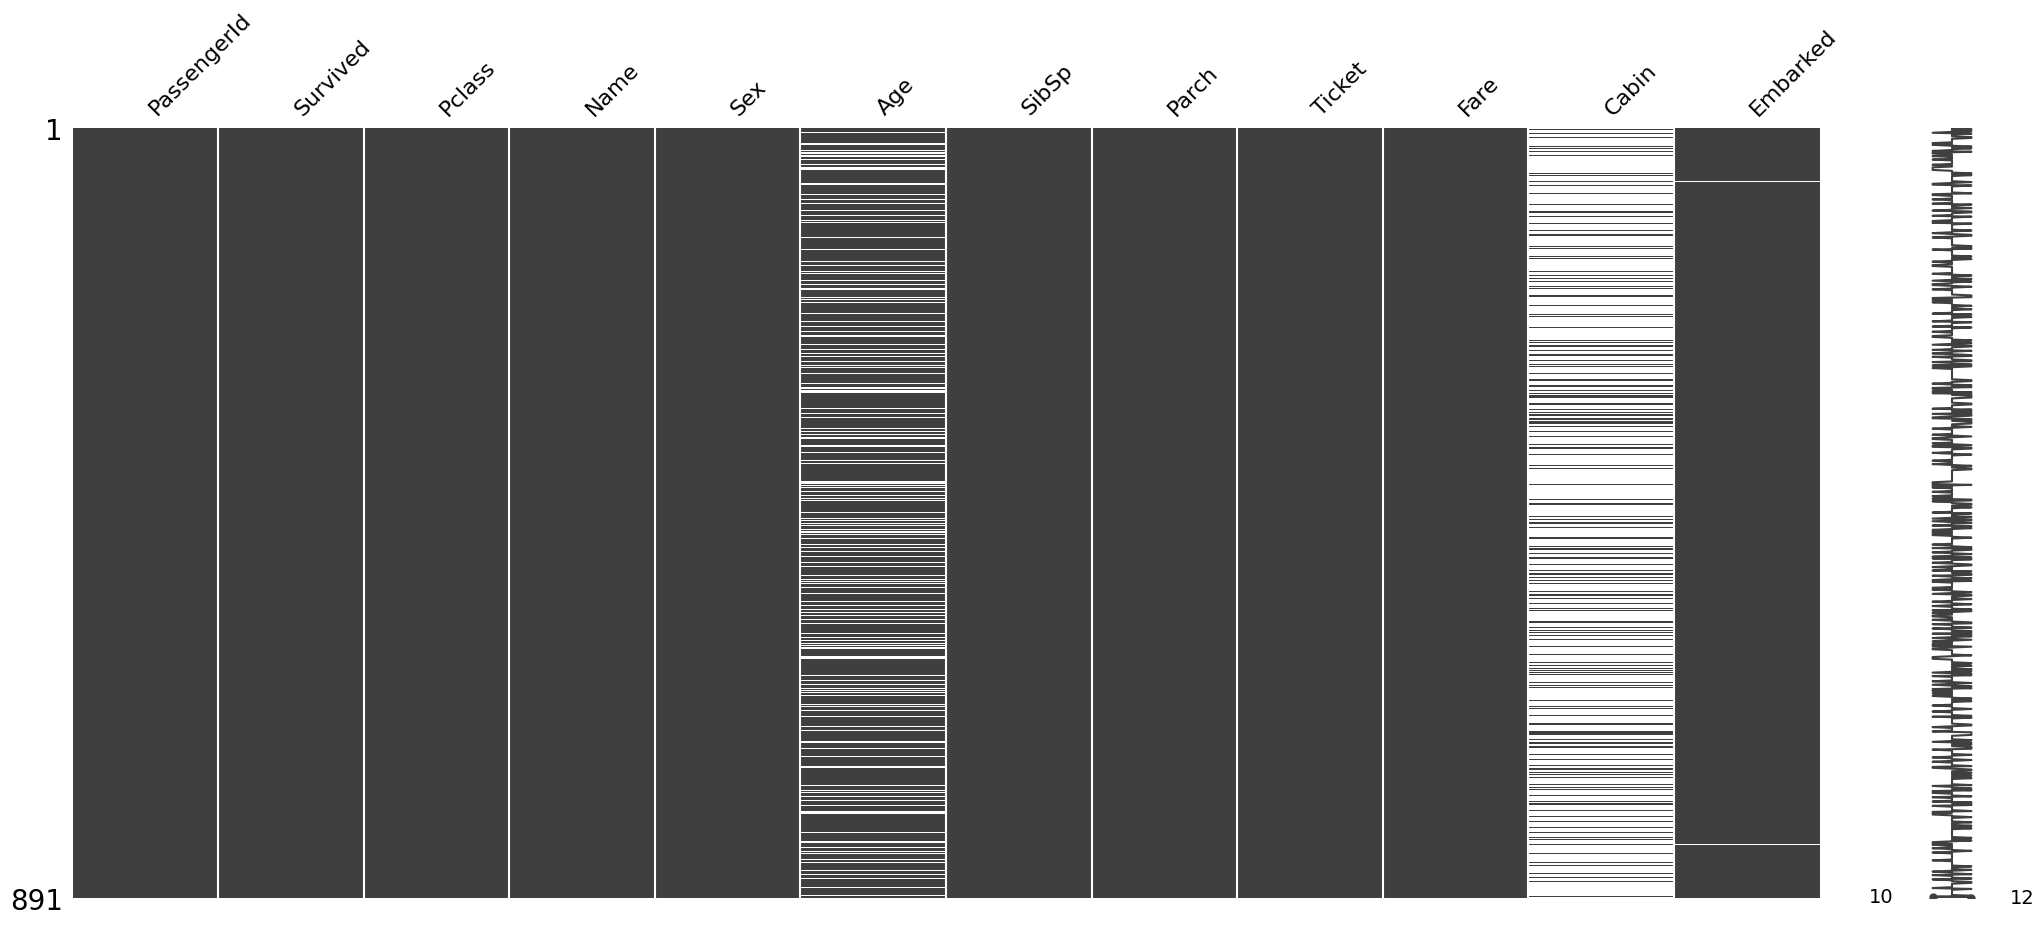

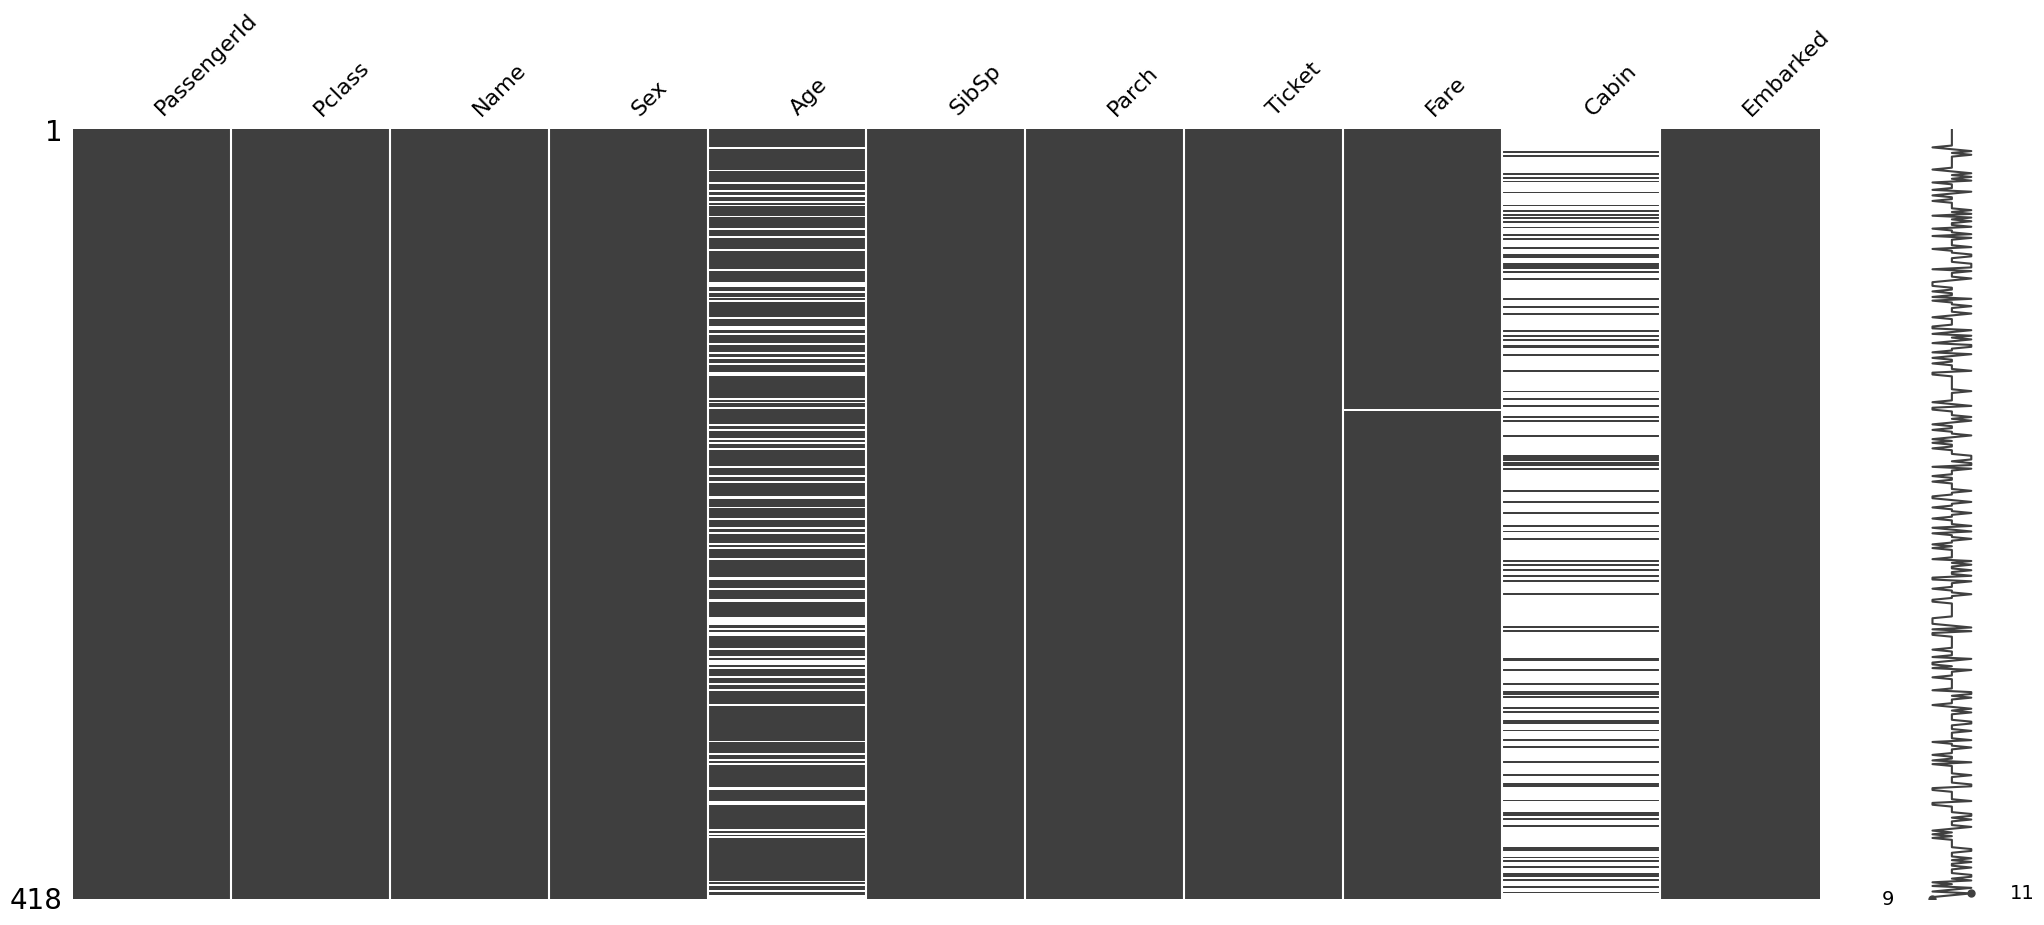

In [27]:
import missingno
missingno.matrix(train_df)

println()

missingno.matrix(test_df)


# Clean Up Data
- Fill NA field

In [28]:
# fill missing values
# fill missing age with median

def clean_data(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna("S", inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    return df

train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

# fill missing carbin with "U" for unknown
# train_df["Cabin"].fillna("U", inplace=True)

# fill missing embarked with "S" for unknown
train_df["Embarked"].fillna("S", inplace=True)

train_df = clean_data(train_df)
test_df = clean_data(test_df)


/tmp/ipykernel_32/3882614254.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_32/3882614254.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [29]:
df_num = train_df[["Age", "SibSp", "Parch", "Fare", "Survived"]]
df_cat = train_df[["Name", "Sex", "Ticket", "Cabin", "Embarked", "Pclass", "Survived"]]

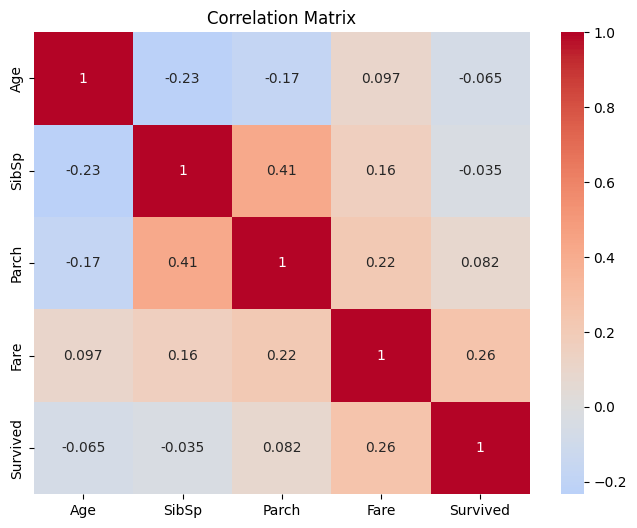

In [30]:
import seaborn as sns

# Make a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

In [31]:
df_num_survived = df_num[df_num["Survived"] == 1]
df_num_not_survived = df_num[df_num["Survived"] == 0]

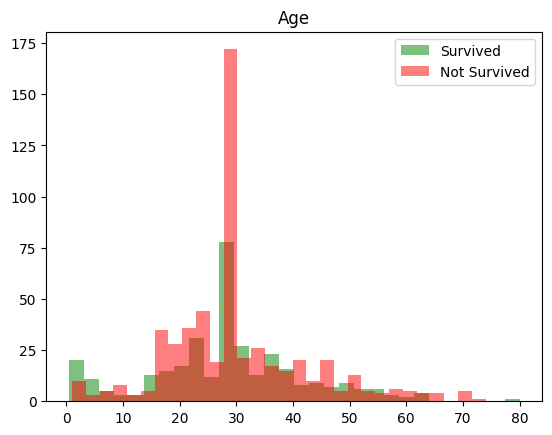

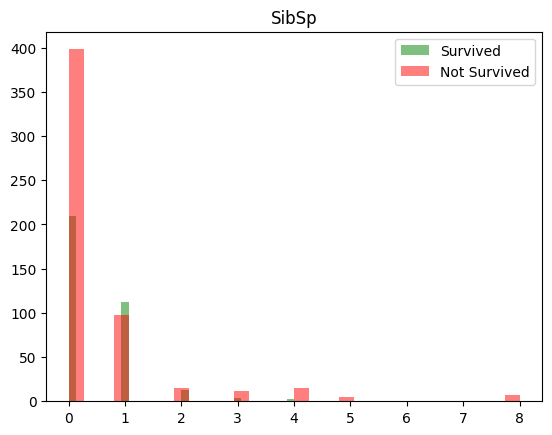

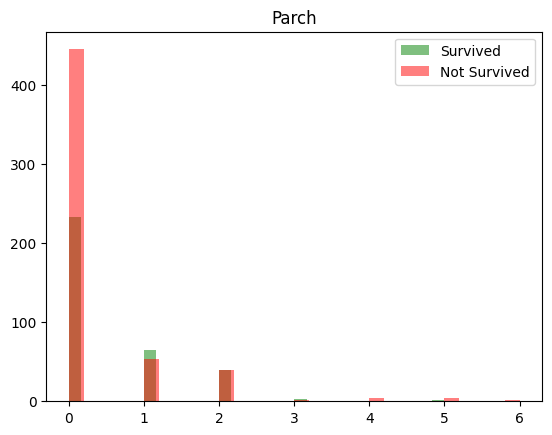

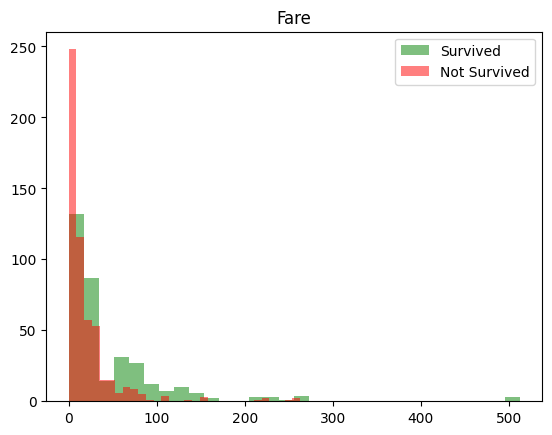

In [32]:
for num_col in df_num.columns:
    if num_col == "Survived":
        continue
    plt.hist(df_num_survived[num_col], alpha=0.5, label="Survived", bins=30, color="green")
    plt.hist(df_num_not_survived[num_col], alpha=0.5, label="Not Survived", bins=30, color="red")
    plt.legend()
    plt.title(num_col)
    plt.show()

In [33]:
def cat_plotbar(df_cat):
    for cat_col in df_cat.columns:
        if cat_col in ["Survived", "Name", "Ticket"]:
            continue
        
        # Calculate value counts for survived and not survived
        survived_counts = df_cat[df_cat['Survived'] == 1][cat_col].value_counts()
        not_survived_counts = df_cat[df_cat['Survived'] == 0][cat_col].value_counts()
        
        # Prepare data for plotting
        categories = sorted(set(survived_counts.index).union(set(not_survived_counts.index)))
        survived_values = [survived_counts.get(category, 0) for category in categories]
        not_survived_values = [not_survived_counts.get(category, 0) for category in categories]
        
        # Create figure with secondary y-axis
        fig = go.Figure()
        
        # Add bars for survived
        fig.add_trace(go.Bar(x=categories, y=survived_values, name='Survived', marker_color='green'))
        
        # Add bars for not survived
        fig.add_trace(go.Bar(x=categories, y=not_survived_values, name='Not Survived', marker_color='red'))
        
        # Update layout
        fig.update_layout(
            title_text=f'Distribution of {cat_col} - Survived vs Not Survived',
            barmode='group',
            xaxis_title=cat_col,
            yaxis_title='Count',
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
        )
        
        # Show figure
        fig.show()
cat_plotbar(df_cat)

In [34]:
# try to find take the first letter of the cabin
cabin_df = train_df[["Cabin", "Survived"]]
cabin_df["Cabin"] = cabin_df["Cabin"].apply(lambda x: x[0] if pd.notnull(x) else "N/A")

# plot cabin distribution again
cat_plotbar(cabin_df)

/tmp/ipykernel_32/2404861726.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Prepare the features for model prediction.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def transform_cabin(df):
    cabin_df = df["Cabin"].apply(lambda x: x[0] if pd.notnull(x) else None)
    # convert it to one-hot encoding
    cabin_df = pd.get_dummies(cabin_df, prefix="Cabin")
    return cabin_df

def transform_embarked(df):
    embarked_df = pd.get_dummies(df["Embarked"], prefix="Embarked")
    return embarked_df



In [36]:
display(transform_cabin(train_df))

display(transform_embarked(train_df))

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,True,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,True,False,False,False,False,False


,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [37]:
def extract_feature(df, onehot=True, hasCarbin=True):
    # for Cabin, take the first letter, and convert to one-hot encoding
    # convert it to first letter of the cabin
    if onehot:
        one_hot_cabin = transform_cabin(df)

        one_hot_embarked = transform_embarked(df)
        
    if hasCarbin:
        df["has_cabin"] = df["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

    # male to 1
    df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

    df = df.drop(["Cabin", "Embarked", "Name", "Ticket", "PassengerId"], axis=1)

    # remove Survived Column if exists
    if "Survived" in df.columns:
        df = df.drop(["Survived"], axis=1)

    if onehot:
        df = pd.concat([df, one_hot_cabin], axis=1)
        df = pd.concat([df, one_hot_embarked], axis=1)
    return df

_train_df = train_df.copy()
y = _train_df["Survived"]



# train_df


Train Model

In [38]:

def fitModel(x_train, y_train):
    model = LogisticRegression(random_state=1, max_iter=1000)
    csf = model.fit(x_train, y_train)
    return csf



In [39]:
from sklearn.metrics import accuracy_score
def getScore(x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1,)
    csf = fitModel(x_train, y_train)
    predictions = csf.predict(x_val)
    return csf, accuracy_score(y_val, predictions)

_train_df = train_df.copy()
x = extract_feature(_train_df, onehot=True, hasCarbin=False)
display(x)
csf1, score1 = getScore(x, y)
score1


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,False,False,False,False,False,False,False,False,False,True
1,1,0,38.0,1,0,71.2833,False,False,True,False,False,False,False,False,True,False,False
2,3,0,26.0,0,0,7.9250,False,False,False,False,False,False,False,False,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,True,False,False,False,False,False,False,False,True
4,3,1,35.0,0,0,8.0500,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,False,False,False,False,False,False,False,False,False,False,True
887,1,0,19.0,0,0,30.0000,False,True,False,False,False,False,False,False,False,False,True
888,3,0,28.0,1,2,23.4500,False,False,False,False,False,False,False,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,False,True,False,False,False,False,False,True,False,False


0.776536312849162

Try to fit again without one-hot encoding

In [40]:
_train_df = train_df.copy()
x = extract_feature(_train_df, onehot=False, hasCarbin=False)
display(x)
csf2, score2 = getScore(x, y)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [41]:
# Try to use has cabin to improve the model

_train_df = train_df.copy()
x = extract_feature(_train_df, onehot=False, hasCarbin=True)
display(x)
csf3, score3 = getScore(x, y)
display(score3)

,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


0.8156424581005587

Best Accuracy achieved from training set is ~0.815. 
The feature being use were:
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Has_Carbin
    - 1 if Carbin is not N/A

In [42]:
# Predict the test data
_test_df = test_df.copy()
x_test = extract_feature(_test_df, onehot=False, hasCarbin=True)
display(x_test)

predictions = csf3.predict(x_test)

# Create a DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame(
    {"PassengerId": test_df["PassengerId"], "Survived": predictions}
)

display(submission)

submission.to_csv("submission.csv", index=False)

,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0
414,1,0,39.0,0,0,108.9000,1
415,3,1,38.5,0,0,7.2500,0
416,3,1,27.0,0,0,8.0500,0


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Conclusion
The final accuracy in test set is <b>0.74880</b>. It is a reasonable result since the data is not perfectly balanced and contains a fair amount of missing values, especially in the 'Age' columns. Despite these challenges, the model demonstrates a good ability to predict survival on the Titanic, highlighting the importance of feature engineering and selection in machine learning tasks. Improvements could include more sophisticated imputation methods for handling missing data, exploration of more complex models, and the use of ensemble techniques to potentially boost the predictive performance.

Throughout this practice, I engaged in data preprocessing, visualized the dataset through various graphs and statistics, and conducted feature engineering based on data types and observed dataset characteristics. The culmination of this process was the application of a logistic regression model for classification purposes. Overall, this project offered a straightforward yet engaging exploration into the realm of machine learning, providing valuable insights and a solid foundation for future projects.